In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

customers=pd.read_csv("Customers.csv")
products=pd.read_csv("Products.csv")
transactions=pd.read_csv("Transactions.csv")

In [3]:
customers.isnull().count()

CustomerID      200
CustomerName    200
Region          200
SignupDate      200
dtype: int64

In [4]:
products.isnull().count()

ProductID      100
ProductName    100
Category       100
Price          100
dtype: int64

In [5]:
transactions.isnull().count()

TransactionID      1000
CustomerID         1000
ProductID          1000
TransactionDate    1000
Quantity           1000
TotalValue         1000
Price              1000
dtype: int64

In [6]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [10]:

transactions['TransactionDate']=pd.to_datetime(transactions['TransactionDate']).dt.date
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68


In [11]:
products=products.drop('Price', axis=1)
products.head()

,ProductID,ProductName,Category
0,P001,ActiveWear Biography,Books
1,P002,ActiveWear Smartwatch,Electronics
2,P003,ComfortLiving Biography,Books
3,P004,BookWorld Rug,Home Decor
4,P005,TechPro T-Shirt,Clothing


In [12]:
#Merge the Data
df=transactions.merge(customers,on="CustomerID",how='left').merge(products,on="ProductID",how='left')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [13]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


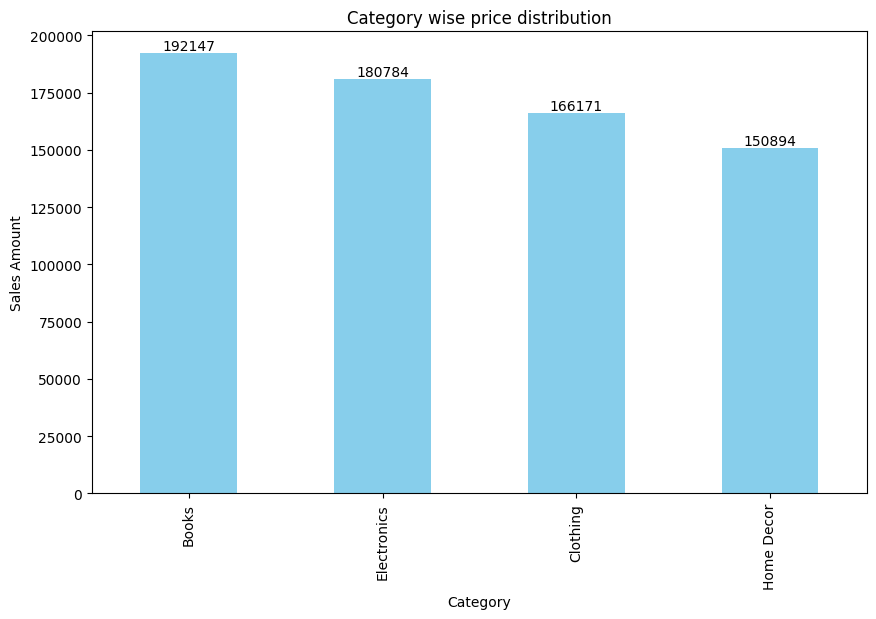

In [14]:
# Product category performance
category_sales = df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
ax=category_sales.plot(kind='bar', figsize=(10, 6), color='skyblue')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title("Category wise price distribution")
plt.ylabel('Sales Amount')
plt.show()


In [15]:
# Most sold products by quantity
most_sold_products_quantity = df.groupby(['ProductID', 'ProductName'])['Quantity'].sum().sort_values(ascending=False).head(10)
print("Most Sold Products (By Quantity):")
print(most_sold_products_quantity)

Most Sold Products (By Quantity):
ProductID  ProductName          
P059       SoundWave Jeans          46
P054       SoundWave Cookbook       46
P029       TechPro Headphones       45
P079       ActiveWear Rug           43
P061       HomeSense Desk Lamp      43
P057       ActiveWear Smartphone    43
P048       TechPro Cookbook         43
P062       HomeSense Novel          39
P020       ActiveWear Jacket        38
P028       HomeSense Desk Lamp      38
Name: Quantity, dtype: int64


In [16]:
# Most sold products by total sales amount
most_sold_products_price = df.groupby(['ProductID', 'ProductName'])['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Most Sold Products (By Price):")
print(most_sold_products_price)

Most Sold Products (By Price):
ProductID  ProductName             
P029       TechPro Headphones          19513.80
P079       ActiveWear Rug              17946.91
P048       TechPro Cookbook            17905.20
P020       ActiveWear Jacket           15060.92
P062       HomeSense Novel             14592.24
P059       SoundWave Jeans             13947.20
P039       TechPro Smartwatch          13778.88
P083       ActiveWear Smartwatch       13671.60
P019       ComfortLiving Sweater       13487.95
P041       ComfortLiving Smartphone    13232.12
Name: TotalValue, dtype: float64


In [32]:
total = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print(total)

Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


In [37]:
# Most sold product in each category by quantity
sales_by_product_category = df.groupby(['Category', 'ProductID']).agg({'Quantity': 'sum'}).reset_index()
most_sold_products = sales_by_product_category.loc[sales_by_product_category.groupby('Category')['Quantity'].idxmax()]

total_sales_by_category = sales_by_product_category.groupby('Category')['Quantity'].sum().reset_index()
total_sales_by_category.rename(columns={'Quantity': 'TotalCategorySales'}, inplace=True)

most_sold_products = pd.merge(most_sold_products, total_sales_by_category, on='Category')

most_sold_products['SalesPercentage'] = (most_sold_products['Quantity'] / most_sold_products['TotalCategorySales']) * 100

print(most_sold_products[['Category', 'ProductID', 'Quantity', 'SalesPercentage']])


      Category ProductID  Quantity  SalesPercentage
0        Books      P054        46         6.754772
1     Clothing      P059        46         7.796610
2  Electronics      P029        45         7.177033
3   Home Decor      P061        43         6.729264


In [18]:
#Region wise customer count
customers['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

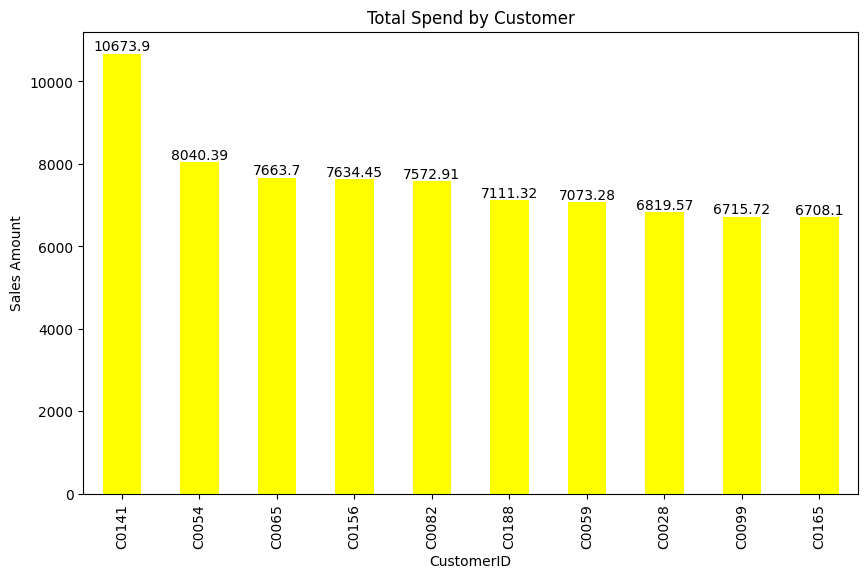

In [28]:
#CustomerLifeTime Value
customer_data = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
ax=customer_data.plot(kind='bar', figsize=(10, 6), color='yellow')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title("Total Spend by Customer")
plt.ylabel('Sales Amount')
plt.show()

In [20]:
# Calculate Average Order Value (AOV)
aov = df['TotalValue'].sum() / df['TransactionID'].nunique()
print(f"Average Order Value (AOV): ${aov:.2f}")

Average Order Value (AOV): $690.00


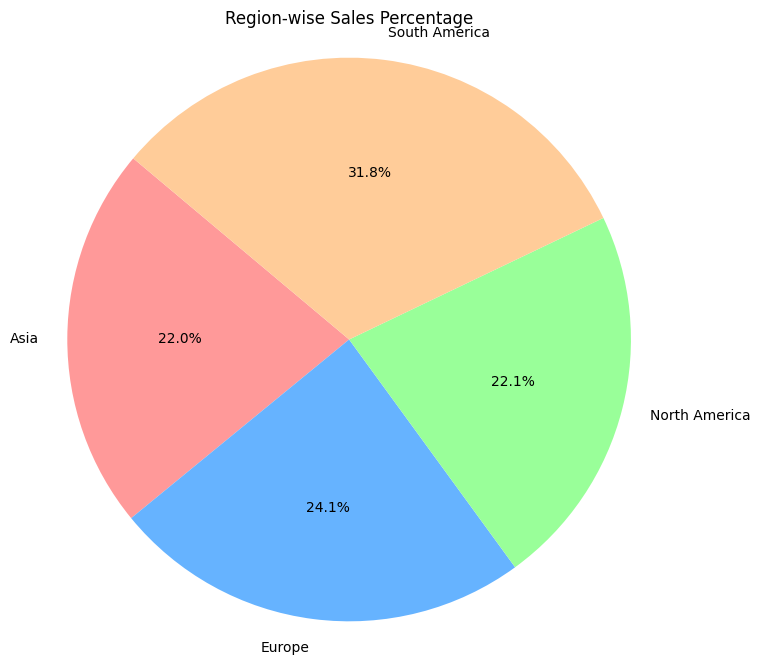

In [31]:
sales_by_region = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left') \
                              .groupby('Region')['TotalValue'].sum().reset_index()

# Calculate total sales
total_sales = sales_by_region['TotalValue'].sum()

# Calculate the percentage sales for each region
sales_by_region['SalesPercentage'] = (sales_by_region['TotalValue'] / total_sales) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region['SalesPercentage'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Region-wise Sales Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

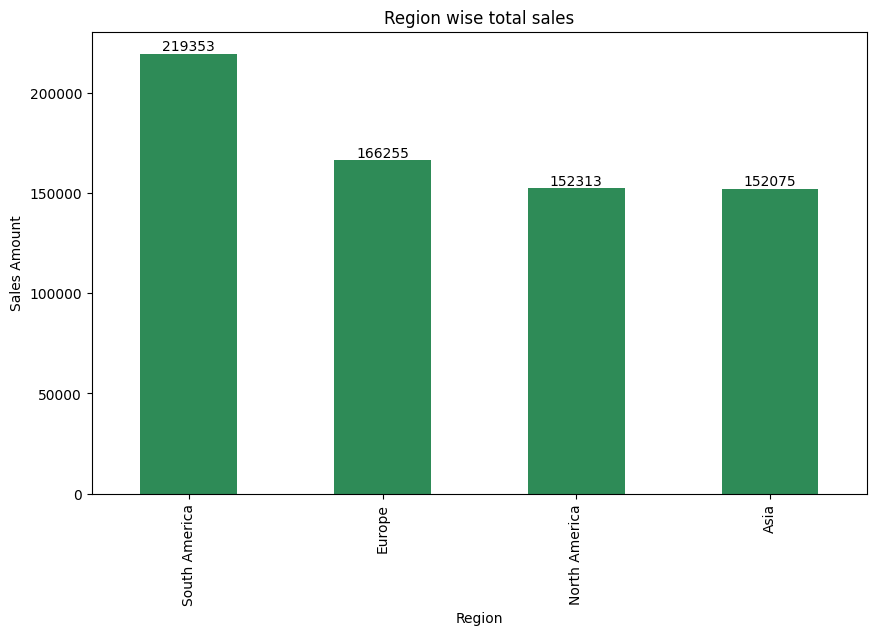

In [22]:
# Region wise performance
region_sales = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
ax=region_sales.plot(kind='bar', figsize=(10, 6), color='seagreen')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title("Region wise total sales")
plt.ylabel('Sales Amount')
plt.show()


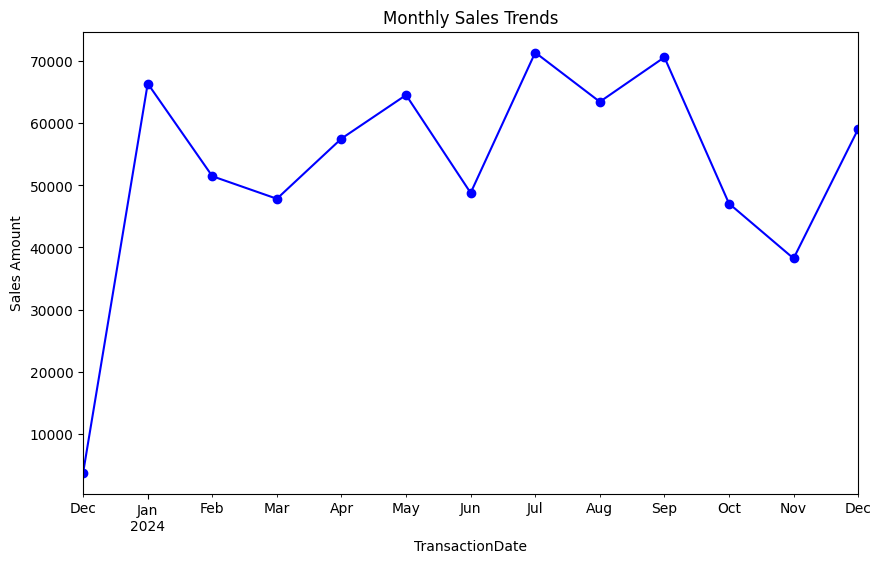

In [23]:
# Sales trends over time
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
monthly_sales = df.groupby(df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
ax=monthly_sales.plot(kind='line', figsize=(10, 6), marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.ylabel('Sales Amount')
plt.show()

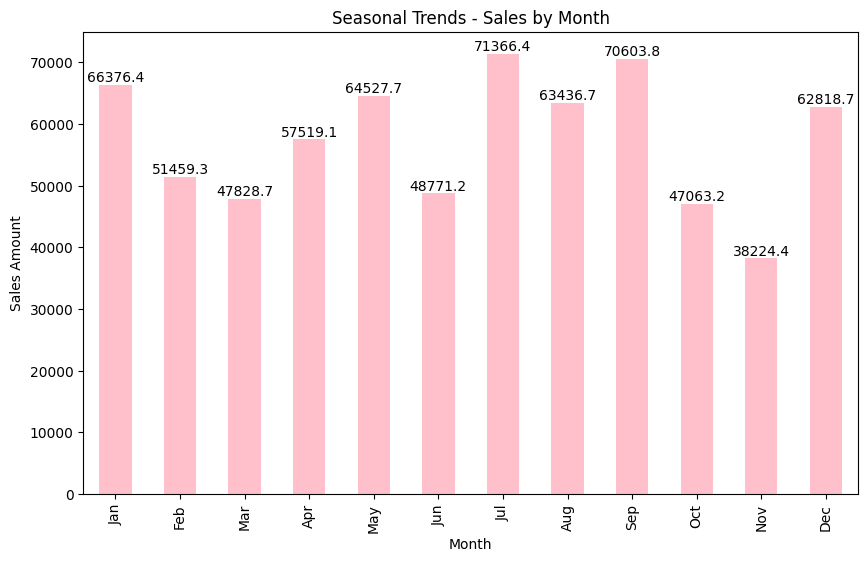

In [24]:
#Seasonal Trends
df['Month'] = df['TransactionDate'].dt.month
seasonal_sales = df.groupby('Month')['TotalValue'].sum()
ax=seasonal_sales.plot(kind='bar', color='pink', figsize=(10, 6))
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Seasonal Trends - Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

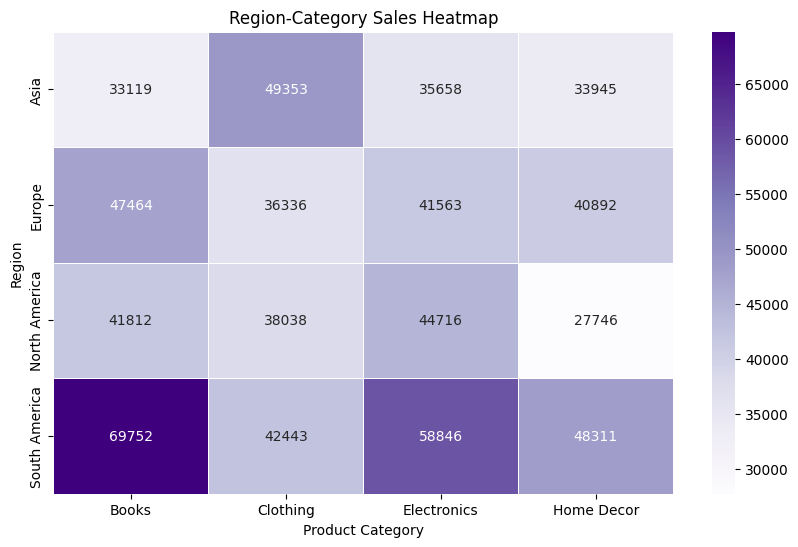

In [25]:
# Pivot table for sales by Region and ProductCategory
region_category_sales = df.pivot_table(
    index='Region', columns='Category', values='TotalValue', aggfunc='sum', fill_value=0
)

plt.figure(figsize=(10, 6))
sns.heatmap(region_category_sales, cmap='Purples', linewidths=0.5, annot=True, fmt=".0f")
plt.title('Region-Category Sales Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.show()

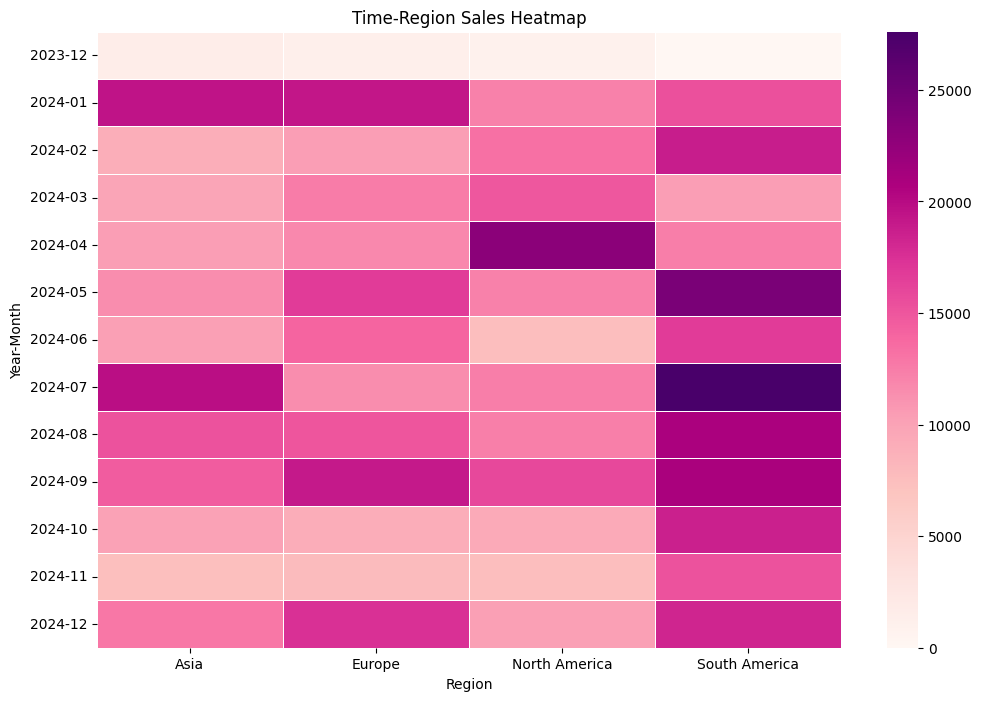

In [26]:
# Add Month and Year columns
df['YearMonth'] = df['TransactionDate'].dt.to_period('M')

# Pivot table for sales by Region and YearMonth
time_region_sales = df.pivot_table(
    index='YearMonth', columns='Region', values='TotalValue', aggfunc='sum', fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(time_region_sales, cmap='RdPu', linewidths=0.5)
plt.title('Time-Region Sales Heatmap')
plt.xlabel('Region')
plt.ylabel('Year-Month')
plt.show()

In [27]:
# Summary report
print("\nSummary Report:")
print("Total Sales:", df['TotalValue'].sum())
print("Total Transactions:", df['TransactionID'].nunique())
print("Unique Customers:", df['CustomerID'].nunique(),)
print("Average Order Value (AOV):",aov)



Summary Report:
Total Sales: 689995.56
Total Transactions: 1000
Unique Customers: 199
Average Order Value (AOV): 689.9955600000001
